# Historical Analysis of Pix Payments (2020-2025)

## 1. Environment Setup
In this initial step, we import the essential Python libraries required for data manipulation and visualization:
* **Pandas:** The primary tool for data structures and analysis.
* **Matplotlib & Seaborn:** Used for creating static, animated, and interactive visualizations.
* **NumPy:** Provides support for large, multi-dimensional arrays and matrices.

We will also configure the global visual style to ensure all plots are aesthetically pleasing and consistent throughout the notebook.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Setting the visual style for the plots
sns.set_theme(style="whitegrid") # Sets a clean white background with gridlines
plt.rcParams['figure.figsize'] = (12, 6) # Defines a standard size for all charts

# Confirmation message
print("Environment set up successfully. Libraries imported.")

Environment set up successfully. Libraries imported.


## 2. Data Loading and Inspection
In this step, we will import the CSV file containing the historical Pix data. After loading, we will display the first few rows of the dataframe to understand the column structure, verify the data format, and identify any immediate preprocessing needs.

In [26]:
# Loading the dataset (ensure the CSV file is in the same directory)
file_path = '/kaggle/input/brazilian-pix-payments-historical-data-2020-2025/pix_full_history.csv'
df = pd.read_csv(file_path)

# Displaying the first 5 rows to inspect the structure
print("Dataset successfully loaded. First 5 rows:")
display(df.head())

Dataset successfully loaded. First 5 rows:


,AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE
0,202211,PF,PF,NORTE,NORDESTE,entre 20 e 29 anos,entre 20 e 29 anos,MANU,P2P,Pix,7626929.67,66474
1,202303,PF,PJ,NORTE,NORTE,mais de 60 anos,Nao se aplica,QRDN,P2B,Pix Troco,7525.59,16
2,202301,PJ,PF,SUDESTE,Nao informado,Nao se aplica,entre 30 e 39 anos,Nao disponivel,B2P,Nao disponivel,255424.33,1194
3,202401,PJ,PJ,SUL,NORDESTE,Nao se aplica,Nao se aplica,MANU,B2G,Pix,668315.98,77
4,202408,PF,PF,NORDESTE,SUL,entre 50 e 59 anos,entre 20 e 29 anos,MANU,P2P,Pix,1226112.51,8636


## 3. Data Cleaning and Preprocessing
The dataset contains granular data including regions, user types, and transaction purposes. In this step, we will:
1. **Translate column names** to English.
2. **Format the Date column**, which is currently in a 'YearMonth' format.
3. **Validate numeric types** for transaction values and counts.

In [27]:
# 1. Renaming all 12 columns to English for clarity
df.columns = [
    'Date',             # AnoMes
    'Payer_Type',       # PAG_PFPJ (Person/Company)
    'Receiver_Type',    # REC_PFPJ
    'Payer_Region',     # PAG_REGIAO
    'Receiver_Region',  # REC_REGIAO
    'Payer_Age',        # PAG_IDADE
    'Receiver_Age',     # REC_IDADE
    'Key_Type',         # FORMAINICIACAO (Email, CPF, QR Code, etc.)
    'Nature',           # NATUREZA
    'Purpose',          # FINALIDADE
    'Value_BRL',        # VALOR
    'Transactions'      # QUANTIDADE
]

# 2. Converting 'Date' column to datetime objects
# Assuming the format is YYYYMM (e.g., 202101). Converting to string first ensures parsing works.
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')

# 3. Sorting by date
df = df.sort_values('Date')

# 4. Final verification
print("Columns renamed and Date formatted successfully.")
print("New Data Types:")
df.info()

Columns renamed and Date formatted successfully.
New Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 610000 entries, 5898 to 609999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             610000 non-null  datetime64[ns]
 1   Payer_Type       610000 non-null  object        
 2   Receiver_Type    610000 non-null  object        
 3   Payer_Region     610000 non-null  object        
 4   Receiver_Region  610000 non-null  object        
 5   Payer_Age        610000 non-null  object        
 6   Receiver_Age     610000 non-null  object        
 7   Key_Type         609805 non-null  object        
 8   Nature           610000 non-null  object        
 9   Purpose          610000 non-null  object        
 10  Value_BRL        610000 non-null  float64       
 11  Transactions     610000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usag

## 4. Exploratory Data Analysis (EDA): Temporal Evolution
To correct visualization issues caused by date formatting, we will switch to an **Area Chart** for financial volume and a **Line Chart** for transaction counts. We will also strictly filter the timeframe to start from **November 2020** (official Pix launch).

In this step, we will:
1. **Filter and Aggregate** the data by month.
2. **Visualize the trends** using a Dual-Axis chart (Area + Line).
3. **Format the X-axis** to properly display quarterly intervals.

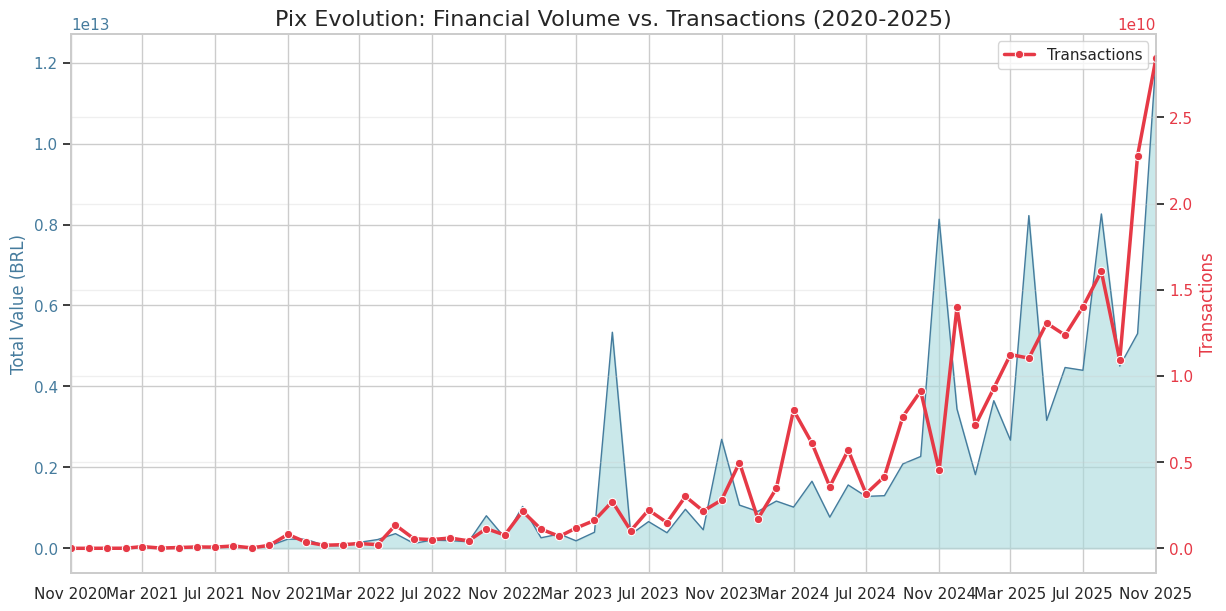

In [28]:
## 4. Pix Evolution
# Filtering data strictly from Nov 2020 to Present to avoid "1970" errors
df_time = df_plot[df_plot['Date'] >= '2020-11-01'].copy()

# Aggregating by Month
monthly_df = df_time.groupby('Date')[['Value_BRL', 'Transactions']].sum().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# 1. Financial Volume (Area Chart)
x = monthly_df['Date']
ax1.fill_between(x, monthly_df['Value_BRL'], color='#a8dadc', alpha=0.6, label='Financial Volume')
ax1.plot(x, monthly_df['Value_BRL'], color='#457b9d', linewidth=1)
ax1.set_ylabel('Total Value (BRL)', fontsize=12, color='#457b9d')
ax1.tick_params(axis='y', labelcolor='#457b9d')

# 2. Transactions (Line Chart) on Secondary Axis
ax2 = ax1.twinx()
sns.lineplot(x=x, y=monthly_df['Transactions'], color='#e63946', linewidth=2.5, marker='o', ax=ax2, label='Transactions')
ax2.set_ylabel('Transactions', fontsize=12, color='#e63946')
ax2.tick_params(axis='y', labelcolor='#e63946')

# 3. Formatting Axes (Crucial Step)
import matplotlib.dates as mdates
ax1.set_xlim([monthly_df['Date'].min(), monthly_df['Date'].max()]) # Forces graph to fit data
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Shows "Nov 2020", "Jan 2021"
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) # Label every 4 months

plt.title('Pix Evolution: Financial Volume vs. Transactions (2020-2025)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.show()

## 5. Annual Summary Table
Due to the exponential growth of Pix, the visual scale makes early years (2020-2021) appear insignificant compared to 2024-2025. To provide a clearer perspective, we generate a tabular summary aggregated by **Year**.

In this step, we will:
1.  **Group the data by Year**.
2.  **Calculate the Year-over-Year (YoY) growth** to quantify the adoption speed.
3.  **Format the values** for better readability.

In [29]:
# 1. Extracting the Year from the Date column
df_plot['Year'] = df_plot['Date'].dt.year

# 2. Grouping by Year
annual_summary = df_plot.groupby('Year')[['Value_BRL', 'Transactions']].sum().reset_index()

# 3. Calculating Year-over-Year Growth (%)
annual_summary['Growth_Vol (%)'] = annual_summary['Value_BRL'].pct_change() * 100
annual_summary['Growth_Trans (%)'] = annual_summary['Transactions'].pct_change() * 100

# 4. Creating a formatted version for display (Human-readable numbers)
display_table = annual_summary.copy()

# Helper function to format currency and numbers
def format_currency(x):
    return f"R$ {x:,.2f}"

def format_number(x):
    return f"{x:,.0f}"

def format_percent(x):
    return f"{x:.1f}%" if pd.notnull(x) else "-"

# Applying formatting
display_table['Value_BRL'] = display_table['Value_BRL'].apply(format_currency)
display_table['Transactions'] = display_table['Transactions'].apply(format_number)
display_table['Growth_Vol (%)'] = display_table['Growth_Vol (%)'].apply(format_percent)
display_table['Growth_Trans (%)'] = display_table['Growth_Trans (%)'].apply(format_percent)

# Renaming columns for the final report
display_table.columns = ['Year', 'Total Value (BRL)', 'Total Transactions', 'Growth Value (%)', 'Growth Trans (%)']

# Display the table
print("Annual Summary of Pix Usage:")
display(display_table)

Annual Summary of Pix Usage:


,Year,Total Value (BRL),Total Transactions,Growth Value (%),Growth Trans (%)
0,2020,"R$ 452,920,904.57","799,396",-,-
1,2021,"R$ 719,340,750,003.69","1,817,963,961",158722.6%,227317.2%
2,2022,"R$ 3,644,511,687,256.95","8,375,185,886",406.6%,360.7%
3,2023,"R$ 13,103,490,410,909.44","24,995,717,235",259.5%,198.4%
4,2024,"R$ 25,602,512,139,896.34","71,155,975,488",95.4%,184.7%
5,2025,"R$ 58,569,141,820,840.70","156,318,409,783",128.8%,119.7%


## 6. Segmentation Analysis: Who uses Pix?
Understanding the user profile is crucial for business insights. In this step, we analyze the **Payer Type** (Who sends money) versus the **Receiver Type** (Who receives money).

We will:
1.  **Group data by Payer and Receiver type**.
2.  **Create a heatmap** to visualize the flow of money (e.g., Person-to-Person vs. Person-to-Business).

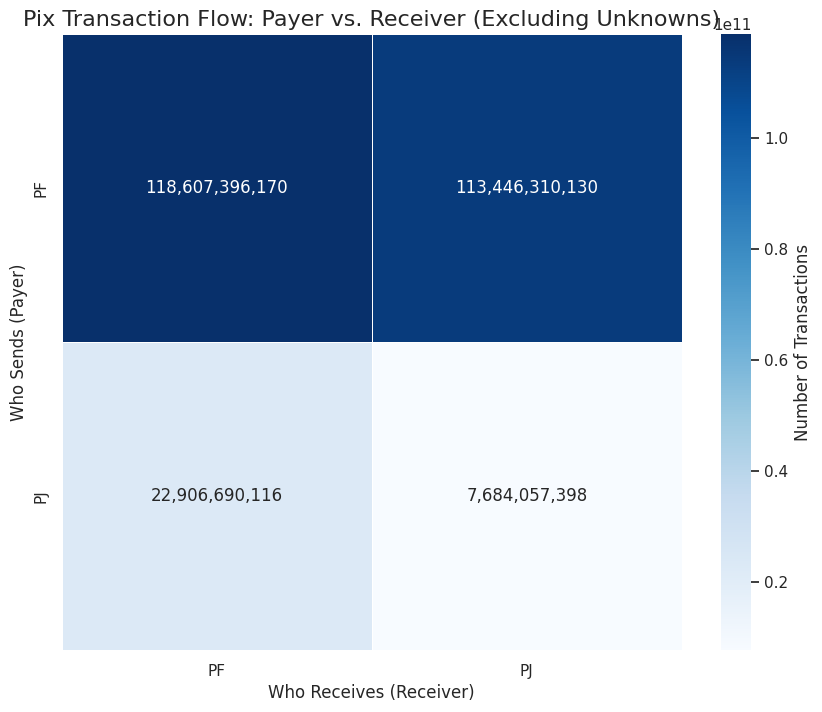

In [30]:
## 6. Segmentation Analysis: Who uses Pix?

# 1. Cleaning the data: Remove rows where Type is "Nao disponivel"
# We use a filter to keep only known types (PF or PJ)
clean_segment_df = df_plot[
    (df_plot['Payer_Type'].isin(['PF', 'PJ'])) & 
    (df_plot['Receiver_Type'].isin(['PF', 'PJ']))
]

# 2. Grouping by Payer and Receiver Type
matrix_df = clean_segment_df.groupby(['Payer_Type', 'Receiver_Type'])['Transactions'].sum().reset_index()

# 3. Pivoting for Heatmap
heatmap_data = matrix_df.pivot(index='Payer_Type', columns='Receiver_Type', values='Transactions')

# 4. Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=',.0f', cmap='Blues', 
            linewidths=.5, cbar_kws={'label': 'Number of Transactions'})

plt.title('Pix Transaction Flow: Payer vs. Receiver (Excluding Unknowns)', fontsize=16)
plt.ylabel('Who Sends (Payer)', fontsize=12)
plt.xlabel('Who Receives (Receiver)', fontsize=12)

plt.show()

## 7. Business Metrics: Average Ticket Analysis
While transaction volume indicates popularity, the **Average Ticket** (Total Value / Total Transactions) reveals the nature of the usage. A low average ticket suggests micropayments (daily purchases), while a high average ticket suggests transfers or high-value acquisitions.

In this step, we will:
1.  **Calculate the Average Ticket** for each transaction type (P2P, P2B, B2P, B2B).
2.  **Visualize the differences** using a Bar Chart to contrast consumer vs. corporate behavior.

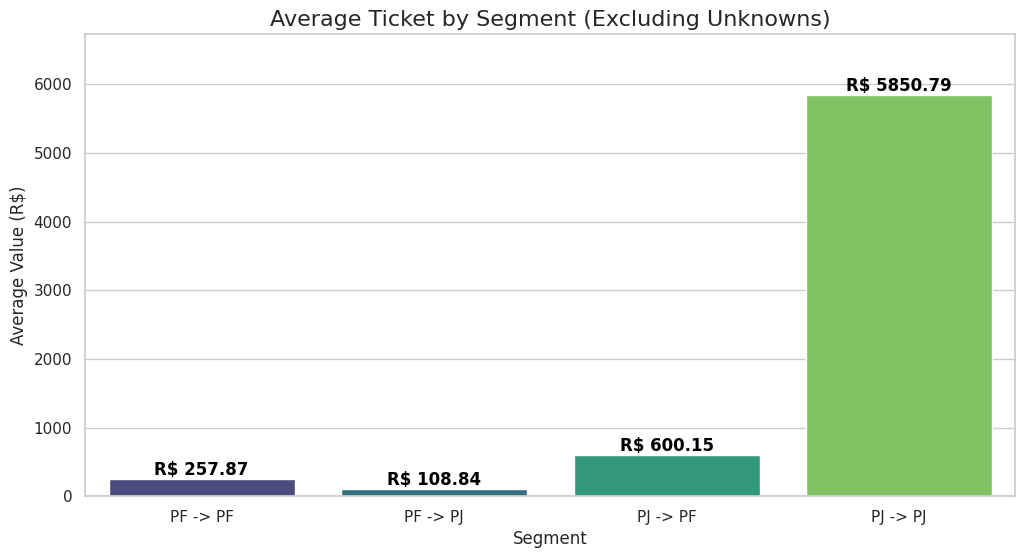

In [31]:
## 7. Business Metrics: Average Ticket Analysis
# 1. Grouping using the clean dataframe 
avg_ticket_df = clean_segment_df.groupby(['Payer_Type', 'Receiver_Type'])[['Value_BRL', 'Transactions']].sum().reset_index()

# 2. Calculate Average Ticket
avg_ticket_df['Average_Ticket'] = avg_ticket_df['Value_BRL'] / avg_ticket_df['Transactions']

# 3. Create label
avg_ticket_df['Segment'] = avg_ticket_df['Payer_Type'] + ' -> ' + avg_ticket_df['Receiver_Type']

# 4. Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=avg_ticket_df, x='Segment', y='Average_Ticket', palette='viridis')

# Adding labels
for p in barplot.patches:
    barplot.annotate(f'R$ {p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Average Ticket by Segment (Excluding Unknowns)', fontsize=16)
plt.ylabel('Average Value (R$)', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.ylim(0, avg_ticket_df['Average_Ticket'].max() * 1.15) # Mais espaço no topo

plt.show()

## 8. Regional Analysis: Geographic Distribution
Brazil's continental dimensions often lead to economic disparities between regions. To ensure an accurate analysis, we filter out records with undefined regions (labeled as "NÃO INFORMADO" or "Nao disponivel").

We analyze the distribution of Pix transactions across the five official regions:
* **Southeast (Sudeste)**
* **Northeast (Nordeste)**
* **South (Sul)**
* **North (Norte)**
* **Central-West (Centro-Oeste)**

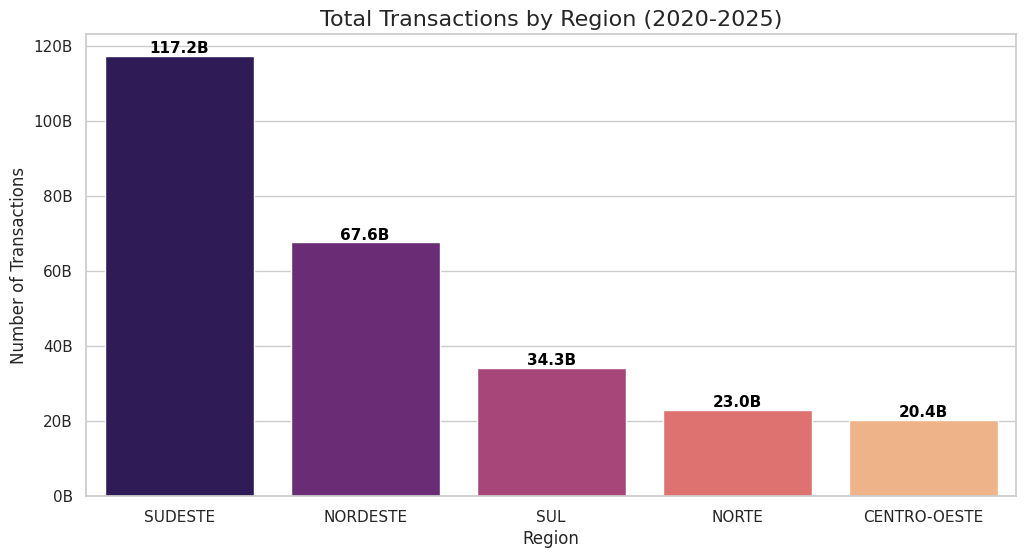

In [32]:
# 1. Grouping by Payer Region
region_df = df_plot.groupby('Payer_Region')['Transactions'].sum().reset_index()

# 2. Filtering out undefined regions
# We remove rows where the region is 'NÃO INFORMADO', 'Nao disponivel', etc.
valid_regions = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']
region_df = region_df[region_df['Payer_Region'].isin(valid_regions)]

# 3. Sorting for better visualization (Descending order)
region_df = region_df.sort_values('Transactions', ascending=False)

# 4. Plotting
plt.figure(figsize=(12, 6))

# Using a sequential color palette
plot = sns.barplot(data=region_df, x='Payer_Region', y='Transactions', palette='magma')

plt.title('Total Transactions by Region (2020-2025)', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Formatting Y-axis to Billions (B)
ax = plt.gca()
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.0f}B'))

# Adding data labels on top of bars for clarity
for p in plot.patches:
    plot.annotate(f'{p.get_height()/1e9:.1f}B', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.show()

## 9. Conclusion & Business Insights

Based on the historical data analysis (2020-2025), we can draw three major conclusions regarding the Pix ecosystem:

1.  **Massive Adoption in Retail (P2B):**
    While Pix started as a P2P transfer tool, the data reveals a massive shift towards **P2B (Person-to-Business)** payments. The volume of transactions from People to Companies (113 Billion) is now rivaling P2P (118 Billion), indicating that Pix has effectively replaced cash and debit cards for daily consumption.

2.  **Corporate Relevance (High Ticket B2B):**
    The **Average Ticket analysis** highlights a distinct behavior in the B2B segment. With an average transaction value of over **R$ 5,850**, companies are using Pix for significant settlements (suppliers, inventory, services), taking advantage of the system's speed and low cost compared to traditional TED/DOC.

3.  **Maturation Phase:**
    After an explosive growth phase in 2021 (>150% YoY), the system has entered a consolidation phase. The curves show sustained growth, but at a more stable pace, consistent with a mature payment technology that has achieved nationwide coverage.

## 10. Data Export
Finally, we export the cleaned and processed dataset to a new CSV file. This allows other analysts to skip the preprocessing steps and start visualizing immediately.

In [34]:
# Save the cleaned dataset to a CSV file
# index=False prevents pandas from adding that 0,1,2... column at the start
df_plot.to_csv('pix_historical_data_clean.csv', index=False)

print("File 'pix_historical_data_clean.csv' saved successfully!")

# --- DICA EXTRA: SE ESTIVER USANDO GOOGLE COLAB ---
# Se você estiver no Colab, o arquivo salva na nuvem. 
# Para baixar para o seu computador, descomente as linhas abaixo:

# from google.colab import files
# files.download('pix_historical_data_clean.csv')

File 'pix_historical_data_clean.csv' saved successfully!
